# FACIAL EMOTION RECOGNITION

This model detects and classifies human emotions from facial expressions in both static images and live webcam feeds.

Libraries used: 
NumPy
OpenCV
Matplotlib
Tensorflow

Authors: ERC, IIT Bombay

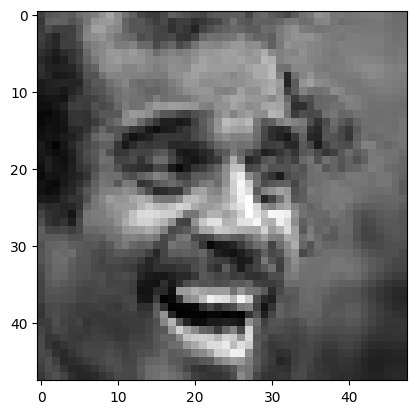

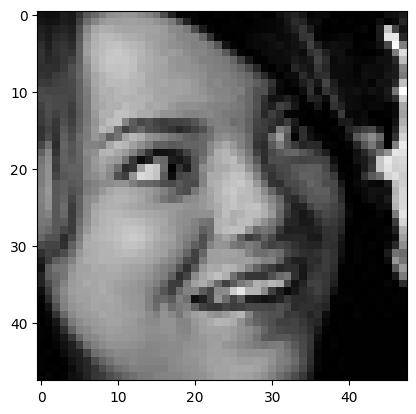

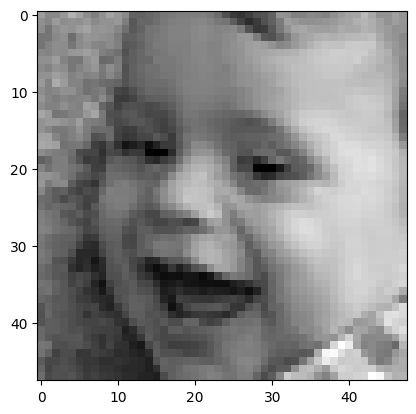

Found 13716 images belonging to 3 classes.
Found 3852 images belonging to 3 classes.


In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array


train_data_dir = 'train'
val_data_dir = 'test'

#printing some data
path=os.path.join(train_data_dir,"happy")
i=0

for img in os.listdir(path):
    i=i+1
    img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    if (i<=3) :
        plt.imshow(img_array, cmap="gray")
        plt.show()
    else:
        break


#data preprocessing, augumenting the images to increase generalization of the model
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(48, 48), color_mode='grayscale', batch_size=64, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_data_dir, target_size=(48, 48), color_mode='grayscale', batch_size=32, class_mode='categorical')


In [4]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) 

model.add(Dense(3, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=30)

c:\Users\kaumo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kaumo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4695 - loss: 1.0395

c:\Users\kaumo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.4697 - loss: 1.0393 - val_accuracy: 0.6228 - val_loss: 0.8629
Epoch 2/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.5974 - loss: 0.8838 - val_accuracy: 0.6921 - val_loss: 0.7098
Epoch 3/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.6524 - loss: 0.7936 - val_accuracy: 0.7139 - val_loss: 0.6693
Epoch 4/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.6787 - loss: 0.7429 - val_accuracy: 0.7606 - val_loss: 0.5763
Epoch 5/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7135 - loss: 0.6808 - val_accuracy: 0.7347 - val_loss: 0.6203
Epoch 6/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.7329 - loss: 0.6417 - val_accuracy: 0.7458 - val_loss: 0.6142
Epoch 7/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.7457 - loss: 0.6120 - val_accuracy: 0.7998 - val_loss: 0.5048
Epoch 8/30
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.7666 - loss: 0.5831 - val_accurac

In [ ]:
emotion_labels = [ 'Happy', 'Sad', 'Surprise']

#capturing videos from webcam
cap = cv2.VideoCapture(0)   

while True:
    
    #capturing a frame from the live webcam feed
    ret, frame = cap.read() 

    #ret=False means that there is some problem with capturing the frame
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
     # using haar cascade inbuilt model to detect faces
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray_frame[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype('float') / 255.0
        roi_gray = img_to_array(roi_gray)
        roi_gray = np.expand_dims(roi_gray, axis=0)
        
        emotion_prediction = model.predict(roi_gray)
        max_index = np.argmax(emotion_prediction)
        emotion = emotion_labels[max_index]
        print(emotion)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 4)
    
    
    cv2.imshow('Emoji Emotion Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):   #press q to close the window
        break

cap.release()
cv2.destroyAllWindows()
